In [20]:
from tensorflow.keras import models
import pandas as pd
import numpy as np

In [4]:
model1=models.load_model("Models/model2_R.h5")

In [6]:
test=pd.read_csv("DailyDelhiClimateTest.csv")
test

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [7]:
test.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [9]:
test["date"]=pd.to_datetime(test["date"])
test.set_index("date",inplace=True)
test

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


In [10]:
def extract_year(value):
  value=value.strftime('%Y-%m-%d')
  return (value[0:4])

In [11]:
def extract_month(value):
    value=value.strftime('%Y-%m-%d')
    return (value[4:6])

In [12]:
def extract_date(value):
    value=value.strftime('%Y-%m-%d')
    return (value[6:8])

In [13]:
test.reset_index(inplace=True)

In [14]:
test['day'] = test['date'].dt.day
test['month'] = test['date'].dt.month
test['year'] = test['date'].dt.year

In [15]:
test

,date,meantemp,humidity,wind_speed,meanpressure,day,month,year
0,2017-01-01,15.913043,85.869565,2.743478,59.000000,1,1,2017
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778,2,1,2017
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333,3,1,2017
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000,4,1,2017
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333,5,1,2017
...,...,...,...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000,20,4,2017
110,2017-04-21,34.250000,39.375000,6.962500,999.875000,21,4,2017
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000,22,4,2017
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000,23,4,2017


In [16]:
test.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
day             0
month           0
year            0
dtype: int64

In [17]:
test=test.drop(["date"],axis=1)
test

,meantemp,humidity,wind_speed,meanpressure,day,month,year
0,15.913043,85.869565,2.743478,59.000000,1,1,2017
1,18.500000,77.222222,2.894444,1018.277778,2,1,2017
2,17.111111,81.888889,4.016667,1018.333333,3,1,2017
3,18.700000,70.050000,4.545000,1015.700000,4,1,2017
4,18.388889,74.944444,3.300000,1014.333333,5,1,2017
...,...,...,...,...,...,...,...
109,34.500000,27.500000,5.562500,998.625000,20,4,2017
110,34.250000,39.375000,6.962500,999.875000,21,4,2017
111,32.900000,40.900000,8.890000,1001.600000,22,4,2017
112,32.875000,27.500000,9.962500,1002.125000,23,4,2017


In [21]:
X_part=test.drop(["meantemp"],axis=1)
Y_part=test["meantemp"]
X_part=np.array(X_part)
Y_part=np.array(Y_part).reshape(-1,1)
print(X_part.shape)
print(Y_part.shape)

(114, 6)
(114, 1)


In [22]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [23]:
scaler2=MinMaxScaler(feature_range=[-1,1])
X_part_scaled=scaler2.fit_transform(X_part)
Y_part_scaled=scaler2.fit_transform(Y_part)

In [24]:
step=30
input=[]
output=[]
for i in range(len(X_part_scaled)-(step)):
    input.append(X_part_scaled[i:i+step])
    output.append(Y_part_scaled[i+step])
 
input=np.array(input)
output=np.array(output)

print(input.shape)
print(output.shape)

(84, 30, 6)
(84, 1)


In [26]:
temp_rs=model1.predict(input)

In [27]:
temp_rs=scaler2.inverse_transform(temp_rs)
temp_rs

array([[16.512691 ],
       [16.549427 ],
       [16.545803 ],
       [16.575584 ],
       [16.714024 ],
       [16.858877 ],
       [16.916094 ],
       [17.142681 ],
       [17.075281 ],
       [16.837828 ],
       [16.556456 ],
       [16.037151 ],
       [16.260983 ],
       [16.793394 ],
       [17.02741  ],
       [17.111034 ],
       [16.981272 ],
       [17.058653 ],
       [17.088787 ],
       [16.904184 ],
       [17.335041 ],
       [17.39362  ],
       [17.827074 ],
       [19.062263 ],
       [19.746614 ],
       [22.081226 ],
       [22.76606  ],
       [20.39386  ],
       [19.368706 ],
       [19.288052 ],
       [19.4327   ],
       [20.203108 ],
       [21.066652 ],
       [19.786596 ],
       [18.823956 ],
       [18.038515 ],
       [17.469175 ],
       [17.22212  ],
       [16.760431 ],
       [16.694601 ],
       [16.90696  ],
       [17.190422 ],
       [17.1326   ],
       [17.080675 ],
       [16.659506 ],
       [16.575766 ],
       [16.63496  ],
       [16.72

In [28]:
test=pd.read_csv("DailyDelhiClimateTest.csv")
test

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [29]:
timeseries_test=test.copy()
timeseries_test["date"].dtype
timeseries_test["date"]=pd.to_datetime(timeseries_test["date"])
timeseries_test.set_index("date",inplace=True)
timeseries_test

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


In [30]:
test_data_temp=pd.DataFrame(list(timeseries_test["meantemp"]),columns=["temp"])
test_data_temp

,temp
0,15.913043
1,18.500000
2,17.111111
3,18.700000
4,18.388889
...,...
109,34.500000
110,34.250000
111,32.900000
112,32.875000


In [31]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
scaler=MinMaxScaler(feature_range=(-1,1))
test_data_temp=scaler.fit_transform(test_data_temp)

In [32]:
steps=30
X_test=[]
Y_test=[]
for i in range(len(test_data_temp)-steps):
  X_test.append(test_data_temp[i:i+steps])
  Y_test.append(test_data_temp[i+steps])
X_test=np.array(X_test)
Y_test=np.array(Y_test)

print(X_test.shape)
print(Y_test.shape)

(84, 30, 1)
(84, 1)


In [33]:
X_test=np.array(X_test)
Y_test=np.array(Y_test)

print(X_test.shape)
print(Y_test.shape)

(84, 30, 1)
(84, 1)


In [34]:
model2=models.load_model("Models/model1_ts.h5")

In [37]:
temp_ts=model2.predict(X_test)
temp_ts=scaler.inverse_transform(temp_ts)
temp_ts

array([[16.5468  ],
       [17.149555],
       [16.645927],
       [17.436497],
       [15.739906],
       [16.204636],
       [18.892931],
       [16.577702],
       [16.964073],
       [15.891701],
       [16.815353],
       [16.3698  ],
       [17.825586],
       [17.033907],
       [17.204517],
       [17.824074],
       [18.583744],
       [18.207615],
       [19.04844 ],
       [19.917786],
       [21.509396],
       [21.611456],
       [19.762861],
       [18.384346],
       [17.629728],
       [19.527636],
       [20.172989],
       [19.60433 ],
       [20.018713],
       [20.525263],
       [23.165108],
       [23.193037],
       [21.479528],
       [20.636497],
       [20.57512 ],
       [21.603283],
       [23.749954],
       [22.472183],
       [22.520998],
       [21.12835 ],
       [21.207203],
       [18.112328],
       [18.325731],
       [19.821564],
       [19.118061],
       [19.73368 ],
       [18.440342],
       [21.828085],
       [21.758833],
       [22.017479],


In [38]:
temp_f=(temp_ts+temp_rs)/2
temp_f

array([[16.529747],
       [16.849491],
       [16.595865],
       [17.00604 ],
       [16.226965],
       [16.531757],
       [17.904512],
       [16.860191],
       [17.019676],
       [16.364765],
       [16.685905],
       [16.203476],
       [17.043285],
       [16.91365 ],
       [17.115963],
       [17.467554],
       [17.782509],
       [17.633133],
       [18.068615],
       [18.410984],
       [19.422218],
       [19.502537],
       [18.794968],
       [18.723305],
       [18.688171],
       [20.804432],
       [21.469524],
       [19.999096],
       [19.69371 ],
       [19.906658],
       [21.298904],
       [21.698072],
       [21.27309 ],
       [20.211548],
       [19.69954 ],
       [19.8209  ],
       [20.609566],
       [19.847153],
       [19.640715],
       [18.911476],
       [19.057081],
       [17.651375],
       [17.729166],
       [18.451118],
       [17.888783],
       [18.154724],
       [17.537651],
       [19.275745],
       [19.301725],
       [19.380444],


In [39]:
Y_test_inv=scaler.inverse_transform(Y_test)

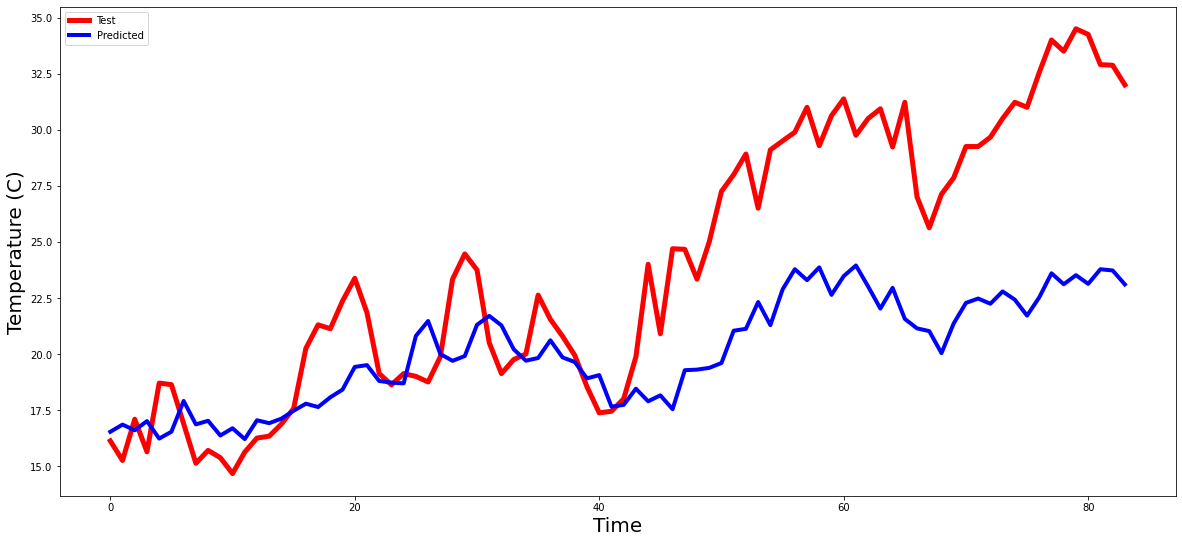

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,9))
plt.plot(Y_test_inv , 'red', linewidth=5)
plt.plot(temp_f,'blue' , linewidth=4)
plt.xlabel("Time", fontsize=20)
plt.ylabel("Temperature (C)", fontsize=20)
plt.legend(('Test','Predicted'))
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [44]:
mse=mean_squared_error(Y_test_inv,temp_f)
mae=mean_absolute_error(Y_test_inv,temp_f)
print(f'{mse} {mae}')

29.896145888894136 4.320905653337216


In [47]:
mse=mean_squared_error(Y_test_inv,temp_rs)
mae=mean_absolute_error(Y_test_inv,temp_rs)
print(f'{mse} {mae}')

93.89017126645788 7.3573949767968205


In [48]:
mse=mean_squared_error(Y_test_inv,temp_ts)
mae=mean_absolute_error(Y_test_inv,temp_ts)
print(f'{mse} {mae}')

4.798618353708427 1.7167213752096082
